Deny Andriana

Image-Classification-Model-Deploymen ---- menentukan jenis olahraga berdasarkan gambar

Dataset Sports Image Classification ------ Link:!kaggle datasets download -d rishikeshkonapure/sports-image-dataset

In [1]:
# install kaggle
!pip install -q kaggle

In [69]:
#library
import os
import glob 
import warnings

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [3]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"enkei0107","key":"86678fa772f067d6e189be9ee711580f"}'}

In [15]:
# buat directory 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [16]:
#download dataset dari kaggle
!kaggle datasets download -d rishikeshkonapure/sports-image-dataset

 97% 454M/466M [00:04<00:00, 97.7MB/s]
100% 466M/466M [00:04<00:00, 113MB/s] 


In [17]:
#extract dataset
!mkdir sport-dataset
!unzip sports-image-dataset.zip -d sport-dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: sport-dataset/data/shooting/00000172.jpg  
  inflating: sport-dataset/data/shooting/00000173.jpg  
  inflating: sport-dataset/data/shooting/00000174.jpg  
  inflating: sport-dataset/data/shooting/00000175.jpg  
  inflating: sport-dataset/data/shooting/00000176.jpg  
  inflating: sport-dataset/data/shooting/00000177.jpg  
  inflating: sport-dataset/data/shooting/00000178.jpg  
  inflating: sport-dataset/data/shooting/00000179.jpg  
  inflating: sport-dataset/data/shooting/00000180.jpg  
  inflating: sport-dataset/data/shooting/00000183.jpg  
  inflating: sport-dataset/data/shooting/00000184.jpg  
  inflating: sport-dataset/data/shooting/00000185.JPG  
  inflating: sport-dataset/data/shooting/00000186.jpg  
  inflating: sport-dataset/data/shooting/00000187.jpg  
  inflating: sport-dataset/data/shooting/00000188.jpg  
  inflating: sport-dataset/data/shooting/00000189.jpg  
  inflating: sport-dataset/data/shooting/0000

In [18]:
#buat directori untuk train dan validasi
base_dir = 'sport-dataset'
train_dir = os.path.join(base_dir,'train-set')
validation_dir = os.path.join(base_dir, 'validation-set')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [29]:
#disini saya hanya menggunakan 4 olahraga saja sebagai datasetnya
badminton_dir = os.path.join(base_dir,'data/badminton')
basket_dir = os.path.join(base_dir,'data/basketball')
football_dir = os.path.join(base_dir,'data/football')
swimming_dir = os.path.join(base_dir,'data/swimming')

In [27]:
len(os.listdir('sport-dataset/data/badminton'))

927

In [28]:
len(os.listdir('sport-dataset/data/basketball'))

486

In [24]:
len(os.listdir('sport-dataset/data/football'))

791

In [25]:
len(os.listdir('sport-dataset/data/swimming'))

681

In [32]:
#membagi dataset menjadi 2 yaitu train(80%) dan validation(20%)
train_badminton_dir, validation_badminton_dir = train_test_split(os.listdir(badminton_dir), test_size = 0.2)
train_basket_dir, validation_basket_dir = train_test_split(os.listdir(basket_dir), test_size = 0.2)
train_football_dir, validation_football_dir = train_test_split(os.listdir(football_dir), test_size = 0.2)
train_swimming_dir, validation_swimming_dir = train_test_split(os.listdir(swimming_dir), test_size = 0.2)

In [34]:
#buat direktori untuk data train dan validation perolahraga
train_badminton = os.path.join(train_dir, 'badminton')
train_basket = os.path.join(train_dir, 'basket')
train_football = os.path.join(train_dir, 'football')
train_swimming = os.path.join(train_dir, 'swimming')

validation_badminton = os.path.join(validation_dir, 'badminton')
validation_basket = os.path.join(validation_dir, 'basket')
validation_football = os.path.join(validation_dir, 'football')
validation_swimming = os.path.join(validation_dir, 'swimming')

if not os.path.exists(train_badminton):
  os.mkdir(train_badminton)
if not os.path.exists(train_basket):
  os.mkdir(train_basket)
if not os.path.exists(train_football):
  os.mkdir(train_football)
if not os.path.exists(train_swimming):
  os.mkdir(train_swimming)

if not os.path.exists(validation_badminton):
  os.mkdir(validation_badminton)
if not os.path.exists(validation_basket):
  os.mkdir(validation_basket)
if not os.path.exists(validation_football):
  os.mkdir(validation_football)
if not os.path.exists(validation_swimming):
  os.mkdir(validation_swimming)

In [35]:
#masukan data train dan validation ke direktori baru
import shutil
for i in train_badminton_dir:
  shutil.copy(os.path.join(badminton_dir, i), os.path.join(train_badminton, i))
for i in train_basket_dir:
  shutil.copy(os.path.join(basket_dir, i), os.path.join(train_basket, i))
for i in train_football_dir:
  shutil.copy(os.path.join(football_dir, i), os.path.join(train_football, i))
for i in train_swimming_dir:
  shutil.copy(os.path.join(swimming_dir, i), os.path.join(train_swimming, i))

for i in validation_badminton_dir:
  shutil.copy(os.path.join(badminton_dir, i), os.path.join(validation_badminton, i))
for i in validation_basket_dir:
  shutil.copy(os.path.join(basket_dir, i), os.path.join(validation_basket, i))
for i in validation_football_dir:
  shutil.copy(os.path.join(football_dir, i), os.path.join(validation_football, i))
for i in validation_swimming_dir:
  shutil.copy(os.path.join(swimming_dir, i), os.path.join(validation_swimming, i))


In [36]:
len(os.listdir('sport-dataset/train-set/badminton'))

741

In [37]:
len(os.listdir('sport-dataset/validation-set/badminton'))

186

In [38]:
len(os.listdir('sport-dataset/train-set/basket'))

388

In [39]:
len(os.listdir('sport-dataset/validation-set/basket'))

98

In [40]:
len(os.listdir('sport-dataset/train-set/football'))

632

In [42]:
len(os.listdir('sport-dataset/validation-set/football'))

159

In [43]:
len(os.listdir('sport-dataset/train-set/swimming'))

544

In [44]:
len(os.listdir('sport-dataset/validation-set/swimming'))

137

In [46]:
#augmentasi gambar 
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [47]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

Found 2272 images belonging to 4 classes.
Found 577 images belonging to 4 classes.


In [63]:
# Pembuatan Model dengan tipe Sequential ditambah dengan Conv2D Maxpooling Layer
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),

     Dropout(0.2),
     
     Dense(128, activation = 'relu'),
     Dense(4, activation='softmax')
    ]
)

In [64]:
# Penggunaan Optimizer 'Adam'
Adam(learning_rate=0.00146, name='Adam')
Model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [65]:
#membuat fungsi callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\n Akurasi training dan validasi sekarang telah mencapai > 85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [66]:
num_epochs = 30
history = Model.fit(train_generator,epochs=num_epochs,validation_data = validation_generator,
                  verbose = 1,callbacks=[callbacks])

Epoch 1/30
71/71 [==============================] - 110s 2s/step - loss: 0.9385 - accuracy: 0.5986 - val_loss: 0.6191 - val_accuracy: 0.7608
Epoch 2/30
71/71 [==============================] - 110s 2s/step - loss: 0.5999 - accuracy: 0.7782 - val_loss: 0.5538 - val_accuracy: 0.8076
Epoch 3/30
71/71 [==============================] - 108s 2s/step - loss: 0.5533 - accuracy: 0.7975 - val_loss: 0.4125 - val_accuracy: 0.8475
Epoch 4/30
71/71 [==============================] - 112s 2s/step - loss: 0.4752 - accuracy: 0.8336 - val_loss: 0.3960 - val_accuracy: 0.8579
Epoch 5/30
71/71 [==============================] - 107s 2s/step - loss: 0.4595 - accuracy: 0.8473 - val_loss: 0.5529 - val_accuracy: 0.8284
Epoch 6/30
71/71 [==============================] - 107s 2s/step - loss: 0.4817 - accuracy: 0.8354 - val_loss: 0.3805 - val_accuracy: 0.8752
Epoch 7/30
71/71 [==============================] - ETA: 0s - loss: 0.4234 - accuracy: 0.8543
 Akurasi training dan validasi sekarang telah mencapai > 85%

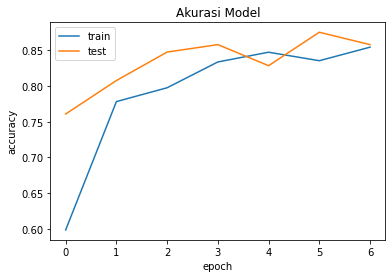

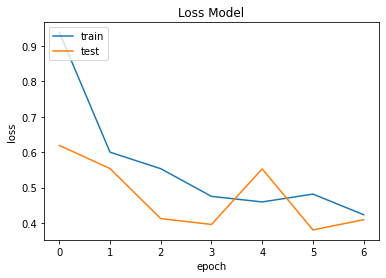

In [67]:
# menampilkan visualisasi plot

#Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving basket.jpg to basket.jpg
1/1 [==============================] - 0s 31ms/step
basket.jpg
basket


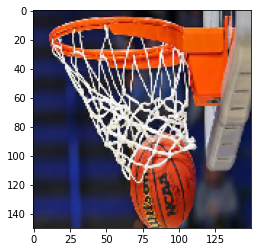

In [75]:
from tensorflow.keras.preprocessing import image
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = Model.predict(images, batch_size=10)  
  print(fn)
  if classes[0,0]!=0:
    print('badminton')
  elif classes[0,1]!=0:
    print('basket')
  elif classes[0,2]!=0:
    print('football')
  else:
    print('swimming')

In [77]:
#export TFLite

# Menghilangkan Warning
warnings.filterwarnings('ignore')

# Convert Model
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()

# Save the model.
with open('sport-dataset/Sport_model.tflite', 'wb') as f:
  f.write(tflite_model)